In [1]:
from sklearn import datasets as ds
import numpy as np
import pandas as pd
import math

def makeSynth(dset_size=1000,
              u_prop=0.5,
              upr=0.1,
              fpr=0.9,
              flip=0,
              sep=1.0,
              seed=None,
              shift=0.0,
             ):
    
    f_prop = 1 - u_prop
    fav_size = math.floor(dset_size * f_prop)
    unfav_size = math.floor(dset_size * u_prop)

    fav = ds.make_classification(n_samples=2*fav_size,
                                 n_features=1,
                                 n_informative=1,
                                 n_redundant=0,
                                 n_repeated=0,
                                 n_clusters_per_class=1,
                                 weights=None,
                                 flip_y=flip,
                                 class_sep=sep,
                                 hypercube=True,
                                 shift=shift,
                                 scale=1.0,
                                 shuffle=True,
                                 random_state=seed)

    unfav = ds.make_classification(n_samples=2*unfav_size,
                                   n_features=1,
                                   n_informative=1,
                                   n_redundant=0,
                                   n_repeated=0,
                                   n_clusters_per_class=1,
                                   weights=None,
                                   flip_y=flip,
                                   class_sep=sep,
                                   hypercube=True,
                                   shift=shift,
                                   scale=1.0,
                                   shuffle=True,
                                   random_state=seed)


    fav_pos = np.random.choice(fav[0].flatten()[np.where(fav[1] == 1)],
                               math.floor(fav_size * fpr),
                               replace=False)

    fav_neg = np.random.choice(fav[0].flatten()[np.where(fav[1] == 0)],
                               math.floor(fav_size * (1 - fpr)),
                               replace=False)

    unfav_pos = np.random.choice(unfav[0].flatten()[np.where(unfav[1] == 1)],
                                 math.floor(unfav_size * upr),
                                 replace=False)

    unfav_neg = np.random.choice(unfav[0].flatten()[np.where(unfav[1] == 0)],
                                 math.floor(unfav_size * (1 - upr)),
                                 replace=False)
    
    fp = pd.DataFrame({'feature': fav_pos,
                       'pa': 1,
                       'label': 1})

    fn = pd.DataFrame({'feature': fav_neg,
                       'pa': 1,
                       'label': 0})

    up = pd.DataFrame({'feature': unfav_pos,
                       'pa': 0,
                       'label': 1})

    un = pd.DataFrame({'feature': unfav_neg,
                       'pa': 0,
                       'label': 0})

    frames = [fp, fn, up, un]

    df = pd.concat(frames)
    
    return df

In [2]:
def makeCircles(dset_size=1000,
                u_prop=0.5,
                upr=0.1,
                fpr=0.9,
                factor=0.8,
                noise=None,
                seed=5,
               ):
    
    f_prop = 1 - u_prop
    fav_size = math.floor(dset_size * f_prop)
    unfav_size = math.floor(dset_size * u_prop)

    fav = ds.make_circles(n_samples=2*fav_size,
                                 noise=noise,
                                 factor=factor,
                                 shuffle=True,
                                 random_state=seed)

    unfav = ds.make_circles(n_samples=2*unfav_size,
                                   noise=noise,
                                   factor=factor,
                                   shuffle=True,
                                   random_state=seed)


    fpi = np.random.choice(np.where(fav[1] == 1)[0],
                           math.floor(fav_size * fpr),
                           replace=False)
    
    fni = np.random.choice(np.where(fav[1] == 0)[0],
                           math.floor(fav_size * (1 - fpr)),
                           replace=False)
    
    upi = np.random.choice(np.where(unfav[1] == 1)[0],
                           math.floor(unfav_size * upr),
                           replace=False)
    
    uni = np.random.choice(np.where(unfav[1] == 0)[0],
                           math.floor(unfav_size * (1 - upr)),
                           replace=False)
    
    fp = pd.DataFrame({'feat1': fav[0][fpi, 0],
                       'feat2': fav[0][fpi, 1],
                       'pa': 1,
                       'label': 1,})

    fn = pd.DataFrame({'feat1': fav[0][fni, 0],
                       'feat2': fav[0][fni, 1],
                       'pa': 1,
                       'label': 0,})

    up = pd.DataFrame({'feat1': unfav[0][upi, 0],
                       'feat2': unfav[0][upi, 1],
                       'pa': 0,
                       'label': 1,})

    un = pd.DataFrame({'feat1': unfav[0][uni, 0],
                       'feat2': unfav[0][uni, 1],
                       'pa': 0,
                       'label': 0,})

    frames = [fp, fn, up, un]

    df = pd.concat(frames)
    
    return df

In [3]:
tc1 = makeCircles(upr=0.1, fpr=0.9, factor=0.5, noise=0.05)
tc2 = makeCircles(upr=0.1, fpr=0.9, factor=0.5, noise=0.2)

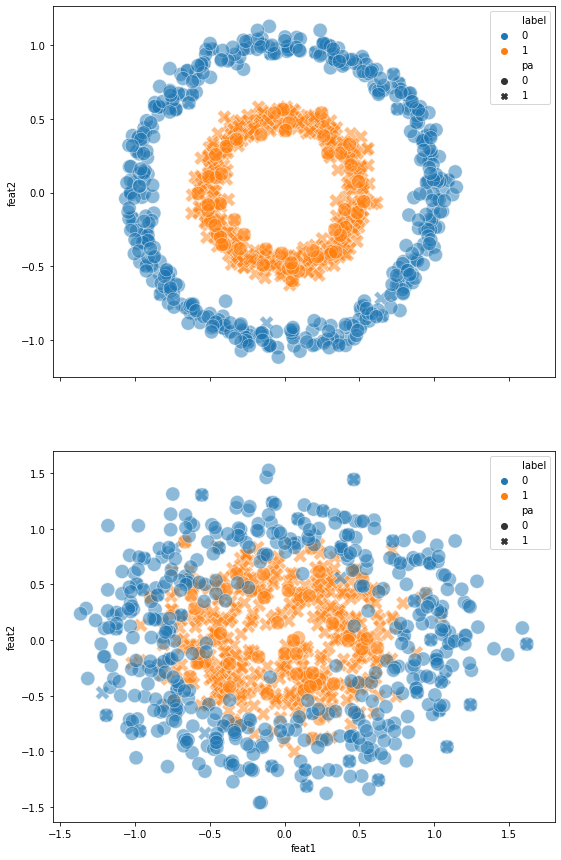

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(9, 15))

sns.scatterplot(x='feat1', y='feat2', hue='label', style='pa', data=tc1,
                alpha=0.5, ax=ax1, s=200)
sns.scatterplot(x='feat1', y='feat2', hue='label', style='pa', data=tc2,
                alpha=0.5, ax=ax2, s=200)
plt.show()

In [6]:
savepath = '../Datasets/Synthetic/'
tc1.to_csv(savepath + 'circles.csv', index=False)

In [8]:
sep_dfs = {i: makeSynth(sep=0.2*i, seed=5,) for i in range(11)}
flip_dfs = {i: makeSynth(sep=2, flip=0.1*i, seed=5,) for i in range(11)}
both_dfs = {i: makeSynth(sep=0.1*i, flip=0.1*i, seed=5,) for i in range(11)}
shift_dfs = {i: makeSynth(sep=2, shift=0.1*i, seed=5,) for i in range(11)}

In [87]:
savepath = '../Datasets/Synthetic/'

[sep_dfs[i].to_csv(savepath + 'sep_' + str(i) + '.csv', index=False)
 for i in range(11)]

[flip_dfs[i].to_csv(savepath + 'flip_' + str(i) + '.csv', index=False)
 for i in range(11)]

[both_dfs[i].to_csv(savepath + 'both_' + str(i) + '.csv', index=False)
 for i in range(11)]

# [shift_dfs[i].to_csv(savepath + 'shift_' + str(i) + '.csv', index=False)
#  for i in range(11)]

[None, None, None, None, None, None, None, None, None, None, None]

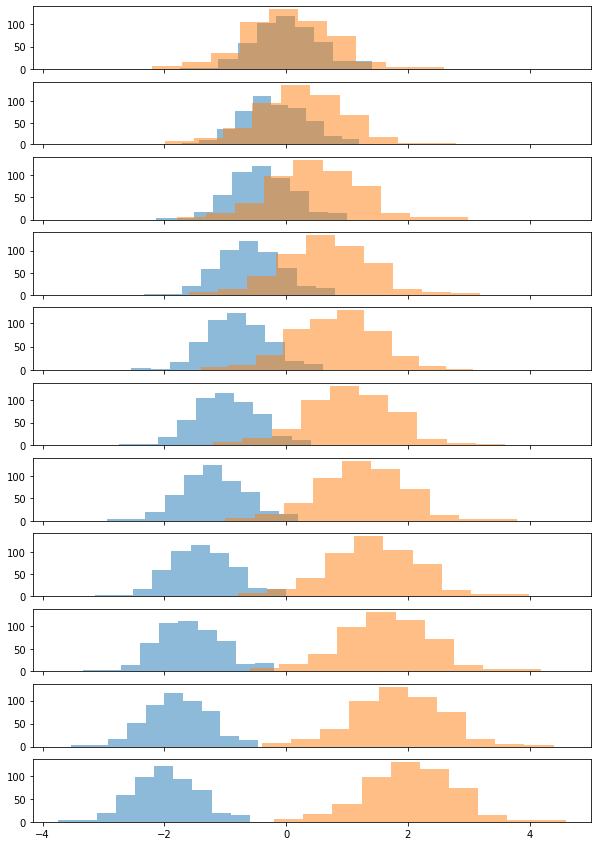

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

f, axs = plt.subplots(11, sharex=True, figsize=(10, 15))

[axs[i].hist(sep_dfs[i][sep_dfs[i].label == 0].feature, alpha=0.5) for i in range(11)]

[axs[i].hist(sep_dfs[i][sep_dfs[i].label == 1].feature, alpha=0.5) for i in range(11)]

plt.show()

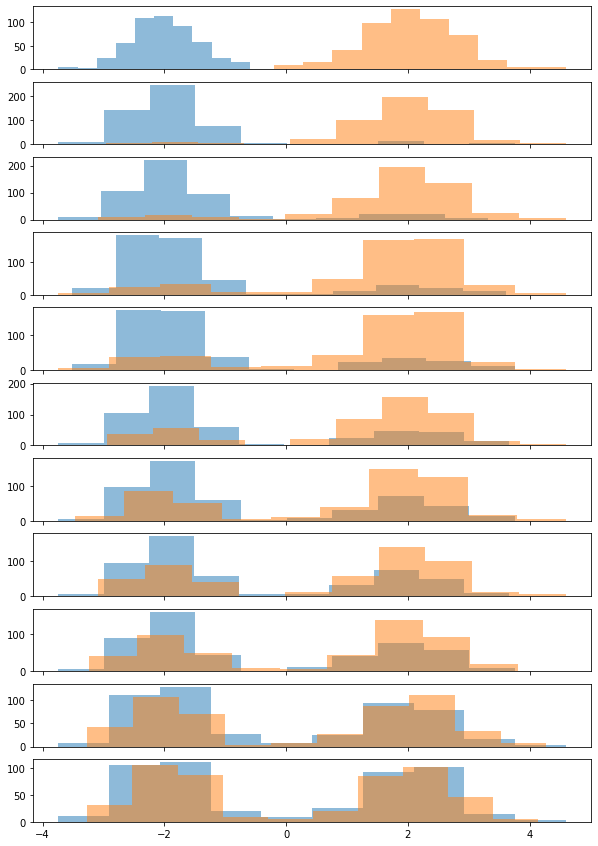

In [89]:
f, axs = plt.subplots(11, sharex=True, figsize=(10, 15))

[axs[i].hist(flip_dfs[i][flip_dfs[i].label == 0].feature, alpha=0.5) for i in range(11)]

[axs[i].hist(flip_dfs[i][flip_dfs[i].label == 1].feature, alpha=0.5) for i in range(11)]

plt.show()

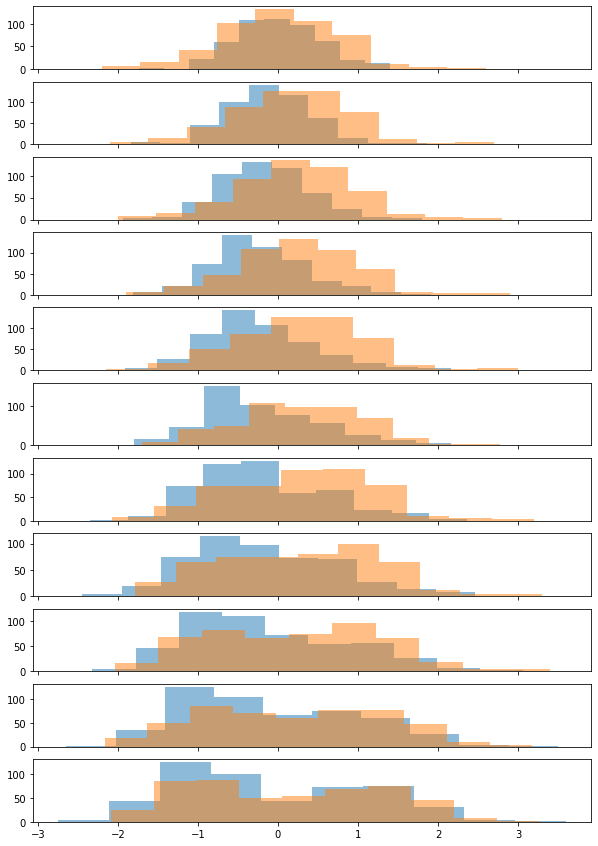

In [90]:
f, axs = plt.subplots(11, sharex=True, figsize=(10, 15))

[axs[i].hist(both_dfs[i][both_dfs[i].label == 0].feature, alpha=0.5) for i in range(11)]

[axs[i].hist(both_dfs[i][both_dfs[i].label == 1].feature, alpha=0.5) for i in range(11)]

plt.show()

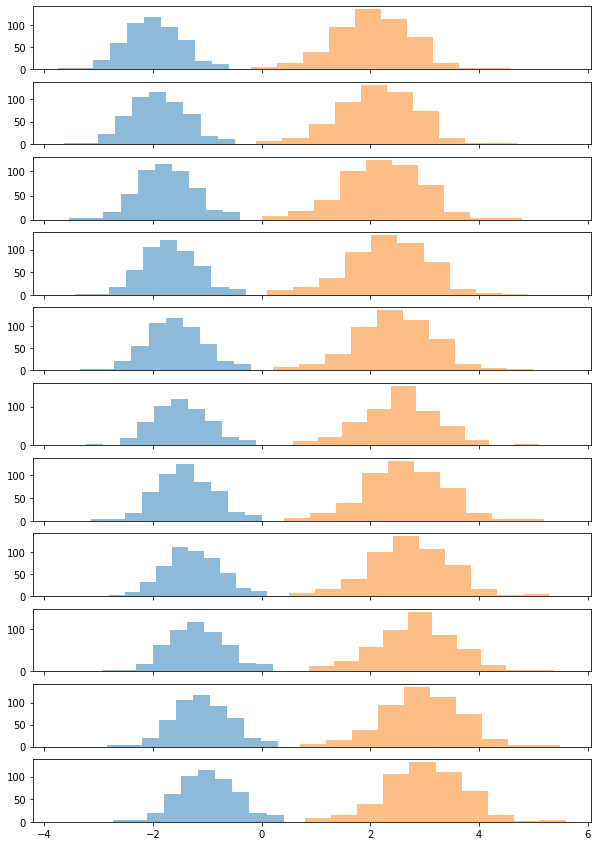

In [9]:
f, axs = plt.subplots(11, sharex=True, figsize=(10, 15))

[axs[i].hist(shift_dfs[i][shift_dfs[i].label == 0].feature, alpha=0.5) for i in range(11)]

[axs[i].hist(shift_dfs[i][shift_dfs[i].label == 1].feature, alpha=0.5) for i in range(11)]

plt.show()